## Undirected Graph

In [18]:
#!pip install matplotlib

/Users/chitrunh/miniconda3/envs/graph_torch/lib/python3.9/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


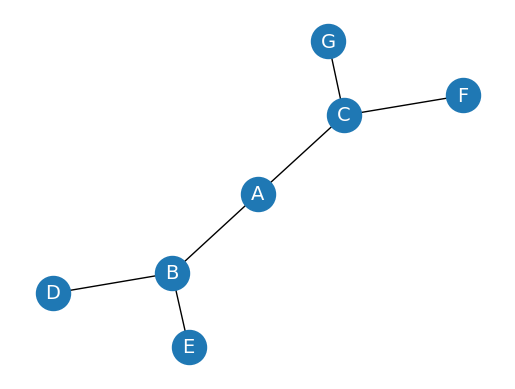

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

## Directed Graph

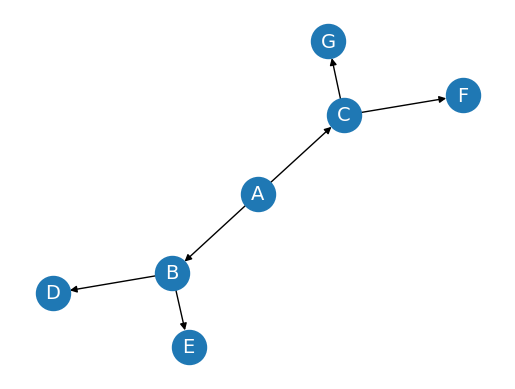

In [20]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

## Weighted Graph

{('A', 'B'): Text(-0.1706315039749037, -0.25785521234238257, '10'),
 ('A', 'C'): Text(0.16908485308194396, 0.25842675360657924, '20'),
 ('B', 'D'): Text(-0.575131951257516, -0.5819114840781282, '30'),
 ('B', 'E'): Text(-0.30708754064196153, -0.7577069745265295, '40'),
 ('C', 'F'): Text(0.5743060275721563, 0.5815239318372771, '50'),
 ('C', 'G'): Text(0.3081446719975653, 0.7583070963940803, '60')}

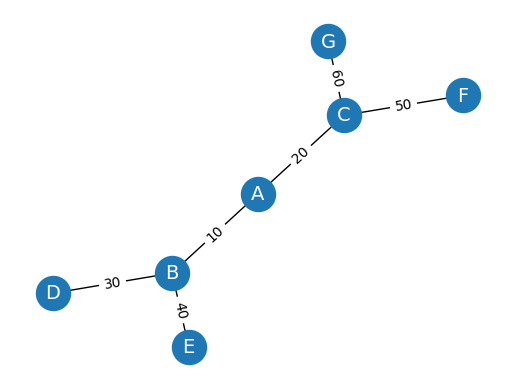

In [21]:

WG = nx.Graph()
WG.add_edges_from([('A', 'B', {"weight": 10}), ('A', 'C', {"weight": 20}), ('B', 'D', {"weight": 30}), ('B', 'E', {"weight": 40}), ('C', 'F', {"weight": 50}), ('C', 'G', {"weight": 60})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(WG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)

# Graph properties
## 1. Connectivity

In [22]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 2 connected? True


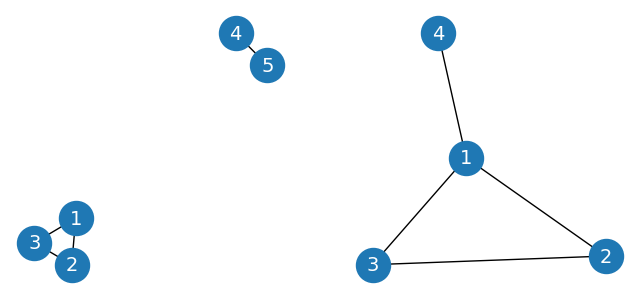

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(G1,
                 pos=nx.spring_layout(G1, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(G2,
                 pos=nx.spring_layout(G2, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

## 2. Node's degree

In [24]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg(A) = {G.degree['A']}")

DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


## 3. Centrality: graph measures

* **Degree centrality** is one of the simplest and most commonly used measures of centrality. It is simply defined as the degree of the node. A high degree centrality indicates that a vertex is highly connected to other vertices in the graph, and thus significantly influences the network.
* **Closeness centrality** measures how close a node is to all other nodes in the graph. It corresponds to the average length of the shortest path between the target node and all other nodes in the graph. A node with high closeness centrality can quickly reach all other vertices in the network.
* **Betweenness centrality** measures the number of times a node lies on the shortest path between pairs of other nodes in the graph. A node with high betweenness centrality acts as a bottleneck or bridge between different parts of the graph.

In [25]:
print(f"Degree centrality      = {nx.degree_centrality(G)}")
print(f"Closeness centrality   = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality      = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness centrality   = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


## Adjacency matrix, Degree Matrix, Incidence matrix, Laplacian Matrix


In [26]:
adj = [[0,1,1,0,0,0,0],
       [1,0,0,1,1,0,0],
       [1,0,0,0,0,1,1],
       [0,1,0,0,0,0,0],
       [0,1,0,0,0,0,0],
       [0,0,1,0,0,0,0],
       [0,0,1,0,0,0,0]]

edge_list = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6)]

adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}


### 1. Incidence Matrix
The incidence matrix of a graph is a matrix that represents the relationship between nodes and edges. In an undirected graph, the incidence matrix \(B\) is defined such that:
   - Rows correspond to nodes.
   - Columns correspond to edges.
   - If node \(i\) is incident to edge \(j\), the entry \(B[i, j]\) is 1. For undirected graphs, an entry is set to 1 for both nodes connected by an edge.

In [27]:
nx.incidence_matrix(G1).todense()

array([[1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

### 2. Degree Matrix

In [28]:
from scipy.sparse import diags

# Get the degrees of each node in the graph
degrees = [deg for node, deg in G2.degree()]

# Create the degree matrix as a diagonal matrix using scipy
degree_matrix = diags(degrees)

# Convert to a dense format if needed
D = degree_matrix.toarray()

# Print the degree matrix
print("Degree Matrix (Sparse format):\n", degree_matrix)
print("\nDegree Matrix (Dense format):\n", D)

Degree Matrix (Sparse format):
   (np.int32(0), np.int32(0))	3.0
  (np.int32(1), np.int32(1))	2.0
  (np.int32(2), np.int32(2))	2.0
  (np.int32(3), np.int32(3))	1.0

Degree Matrix (Dense format):
 [[3. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


In [29]:
import numpy as np

# Get the degree of each node in the graph
degree_dict = dict(G2.degree())

# Create the degree matrix as a NumPy array
num_nodes = len(degree_dict)
degree_matrix = np.zeros((num_nodes, num_nodes))

for i, node in enumerate(degree_dict):
    degree_matrix[i, i] = degree_dict[node]

# Print the degree matrix
print("Degree Matrix:\n", degree_matrix)

Degree Matrix:
 [[3. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


# Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G2).todense()

# Print the Laplacian matrix
print("Laplacian Matrix:\n", laplacian_matrix)

In [30]:
# Compute the adjacency matrix
A = nx.adjacency_matrix(G).todense()

# Print the adjacency matrix
print("Adjacency Matrix:\n", A)
L = D-A
print(L)

Adjacency Matrix:
 [[0 1 1 0 0 0 0]
 [1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]


ValueError: operands could not be broadcast together with shapes (4,4) (7,7) 

## 3. Paths, Circles

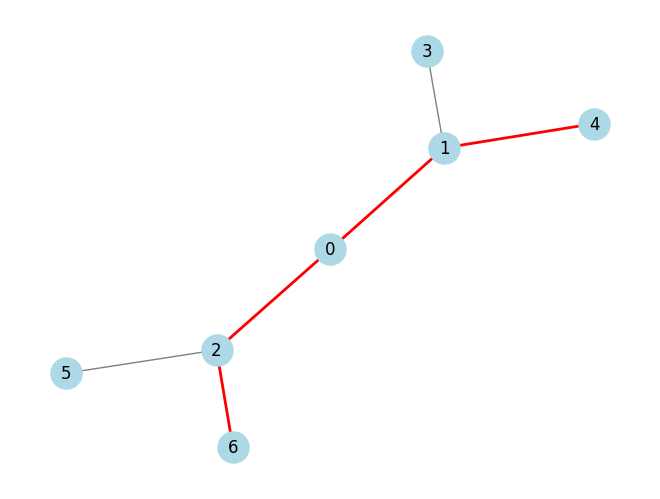

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

# Given adjacency list
adj_list = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1],
    5: [2],
    6: [2]
}

# Create an undirected graph
G2 = nx.Graph()

# Add edges to the graph from the adjacency list
for node, neighbors in adj_list.items():
    for neighbor in neighbors:
        G2.add_edge(node, neighbor)

# Define the path from node 4 to node 6
path = [4, 1, 0, 2, 6]

# Draw the graph with default node and edge colors
pos = nx.spring_layout(G2, seed=42)  # Position the nodes for visualization
# other layouts: nx.circular_layout, nx.random_layout, nx.shell_layout, 
# nx.spectral_layout, nx.spring_layout, nx.kamada_kawai_layout, nx.planar_layout
nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

# Highlight the path edges in red
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G2, pos, edgelist=path_edges, edge_color='red', width=2)

# Show the plot
plt.show()

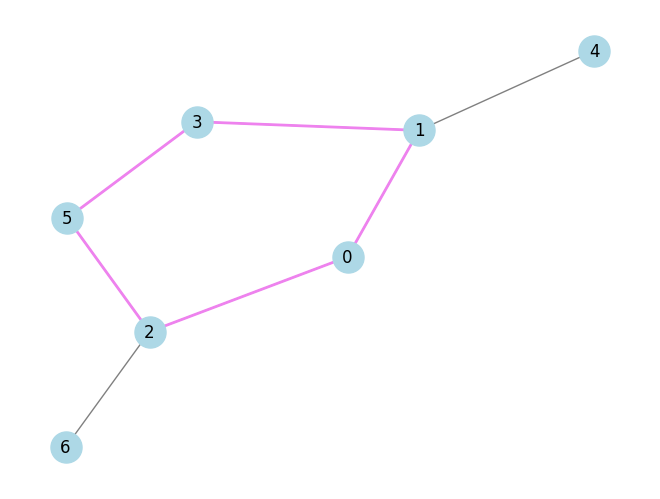

In [32]:
# Add a direct edge from node 5 to node 3
G2.add_edge(5, 3)

# Define the circle path: 5 -> 2 -> 0 -> 1 -> 3 -> 5
circle_path = [5, 2, 0, 1, 3, 5]

# Draw the graph with default node and edge colors
pos = nx.spring_layout(G2, seed=42)  # Position the nodes for visualization
nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)

# Highlight the circle path edges in violet
circle_edges = list(zip(circle_path, circle_path[1:]))
nx.draw_networkx_edges(G2, pos, edgelist=circle_edges, edge_color='violet', width=2)

# Show the plot
plt.show()

# Exploring graph algorithms

## Breadth-Fist Search

In [33]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

def bfs(graph, node):
    visited, queue = [node], [node]

    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)

    return visited

bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

## Depth-Fist Search

![DFS.png](/home/uqcha1/scripts/GNNs/demo_images/DFS.png)

DFS visualization `https://www.youtube.com/watch?v=AaLHehZeYdE`

In [34]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)

    return visited

dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

## Adjacency Spectrum
The command `nx.adjacency_spectrum(G1)` computes the **adjacency spectrum** of a graph `G1`, which is the set of eigenvalues of the graph's adjacency matrix. The adjacency matrix \(A\) is defined such that:

- \(A[i][j] = 1\) if there is an edge between nodes \(i\) and \(j\) (for undirected graphs, this matrix is symmetric).
- \(A[i][j] = 0\) if there is no edge between those nodes.

### Understanding the Adjacency Spectrum
The adjacency spectrum has several important properties and uses:

1. **Graph Properties**: The eigenvalues can provide insights into various properties of the graph, such as connectivity, bipartiteness, and the number of spanning trees.

2. **Graph Isomorphism**: The spectrum can help in determining whether two graphs are isomorphic. However, it is not a definitive test since non-isomorphic graphs can have the same spectrum.

3. **Bipartiteness**: A graph is bipartite if and only if its spectrum consists of an even number of eigenvalues.

4. **Clustering**: The eigenvectors associated with the largest eigenvalues can be used to identify clusters within the graph.

In [35]:
nx.adjacency_spectrum(G1)

array([-1.+0.j,  2.+0.j, -1.+0.j,  1.+0.j, -1.+0.j])

## Laplacian Spectrum
The `nx.laplacian_spectrum()` function computes the **Laplacian spectrum** of a graph, which is the set of eigenvalues of the graph's Laplacian matrix. The Laplacian matrix is an important matrix representation in graph theory and is defined as:

\[ L = D - A \]

where:
- \( L \) is the Laplacian matrix.
- \( D \) is the degree matrix (a diagonal matrix where each entry represents the degree of a node).
- \( A \) is the adjacency matrix of the graph.

### Understanding the Laplacian Spectrum
The Laplacian spectrum consists of the eigenvalues of the Laplacian matrix, and these eigenvalues have significant properties related to the graph's structure:

1. **Number of Connected Components**:
   - The number of zero eigenvalues in the Laplacian spectrum indicates the number of connected components in the graph. If there is exactly one zero eigenvalue, the graph is connected.

2. **Graph Connectivity**:
   - The smallest non-zero eigenvalue (also called the **algebraic connectivity**) measures how well-connected the graph is. A larger value indicates a more strongly connected graph.

3. **Bipartiteness**:
   - If all the non-zero eigenvalues of the Laplacian spectrum are even, then the graph is bipartite.

4. **Graph Partitioning**:
   - The eigenvectors corresponding to the smallest non-zero eigenvalues can be used to partition the graph, which is useful for clustering.

In [36]:
nx.laplacian_spectrum(G2)

array([-8.09266768e-16,  5.18805696e-01,  1.00000000e+00,  1.58578644e+00,
        2.31110782e+00,  4.17008649e+00,  4.41421356e+00])